![uc3m logo](https://assets.onthehub.com/attachments/15/401d138e-5b75-de11-b7f9-0030487d8896/3d13020c-f96c-4a26-8c47-b617961e9c81.jpg)

#AA2024 - PRÁCTICA 2 - CLUSTERING - DETERMINACIÓN DE TIPOS DE ESTRELLAS

**Github:** https://github.com/rosareyes/AA24-100434072-P2

---

**Alumna:**

Rosa Reyes - 100434072


## EXTRACCIÓN DE DATOS
## K-MEANS
## VARIABLES CATEGÓRICAS
### VALORES DE LAS VARIABLES CATEGÓRICAS
### ONE-HOT-ENCODING
#### OHE:KMeans
#### OHE: Hierarchical Clustering
#### DBSCAN
#### Comparar resultados y ver cuál es mejor
### VARIABLE ORDINAL
#### VO:KMeans
#### VO: Hierarchical Clustering
#### VO: DBSCAN
#### Comparar resultados y ver cuál es mejor
### Desición de clustering, algoritmo, hpos
### ¿Hay similitudes con los grupos obtenidos en el punto 4? Explicar

Paso 1: Preparación de los Datos

  Carga de Datos: Importar el conjunto de datos 'stars_data.csv' utilizando pandas.
  Exploración Inicial: Revisar los tipos de datos, valores faltantes y estadísticas básicas del conjunto de datos.

Paso 2: Codificación de Variables Categóricas

  Análisis de Variables Categóricas: 'Color' y 'Spectral_Class'.
  Codificación:
  One-Hot Encoding: Crear variables dummy para cada categoría.
  Codificación Ordinal: Asignar valores numéricos secuenciales basados en alguna lógica inherente (por ejemplo, la temperatura asociada a los colores).

Paso 3: Implementación y Comparación de K-Means

  Implementación Propia de K-Means:
  Crear una función de K-Means siguiendo buenas prácticas de programación.
  Probar la función con un conjunto de datos simple para verificar su funcionamiento.
  Comparación con K-Means de Scikit-Learn:
  Utilizar la implementación de K-Means de la librería scikit-learn.
  Comparar los resultados y la eficiencia con la implementación propia.

Paso 4: Aplicación de Algoritmos de Clustering

  Selección de Algoritmos: Aplicar al menos dos algoritmos de clustering explicados en clase (por ejemplo, K-Means, Clustering Jerárquico, DBSCAN).
  Evaluación de Modelos:
  Comparar los clusters obtenidos por cada algoritmo.
  Discutir los resultados basándose en métricas de evaluación internas como el coeficiente de silueta.

Paso 5: Análisis de Resultados

  Comparación de Clusters:
  Discutir cómo los clusters obtenidos con diferentes codificaciones (one-hot vs. ordinal) afectan los resultados del clustering.
  Recomendaciones:
  Basándote en los resultados, definir un pipeline de clustering recomendado que incluya transformaciones de datos, algoritmo, hiperparámetros y análisis de resultados.

Paso 6: Comparación con Clasificaciones Astronómicas

  Similitudes con Tipos Estelares:
  Comparar los clusters obtenidos con las clasificaciones de estrellas utilizadas comúnmente en astronomía.
        Discutir cualquier similitud o discrepancia observada.

Documentación y Entrega

  Notebook Final:
  Incluir toda la implementación, análisis y discusiones.
  Asegurarse de que el código sea reproducible, fijando la semilla de números aleatorios.

1. Kmeans
Sacar del tutorial makeblob y dibujarlo
crea tu propio kmeans: tu propia funcion
comparar con el kmeans de scikitlearn
luego una grafica

2. variables categoricas
revisar variables primero
one hot coding??? investigar -> este da siempre la misma distancia y no es del todo correcto
ordinal -> probablemente esta por las distancias

one hot coding get dummies??? investigar

PCA? -> hay que hacer dos



## Preparación de los Datos




In [ ]:
import pandas as pd

stars_data = pd.read_csv('stars_data.csv')

# Mostrar las primeras filas del DataFrame para obtener una vista previa de los datos
print("Primeras filas del dataset:")
print(stars_data.head())

# Para cada columna categórica en el DataFrame, imprimir los valores únicos
for column in stars_data.select_dtypes(include='object').columns:
    print(f"\nValores únicos en '{column}': {stars_data[column].unique()}\n")

# Debemos normalizar la columna de Color, ya que tiene como podemos ver valores muy parecidos pero escritos de manera distinta




Primeras filas del dataset:
   Temperature         L       R    A_M Color Spectral_Class
0         3068  0.002400  0.1700  16.12   Red              M
1         3042  0.000500  0.1542  16.60   Red              M
2         2600  0.000300  0.1020  18.70   Red              M
3         2800  0.000200  0.1600  16.65   Red              M
4         1939  0.000138  0.1030  20.06   Red              M

Valores únicos en 'Color': ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']


Valores únicos en 'Spectral_Class': ['M' 'B' 'A' 'F' 'O' 'K' 'G']



Spectral_Class      A   B  F  G  K    M   O
Color                                      
Blue                0  16  0  0  0    0  40
Blue White          1   9  0  0  0    0   0
Blue white          2   2  0  0  0    0   0
Blue-White          1   0  0  0  0    0   0
Blue-white          8  18  0  0  0    0   0
Orange              0   0  0  0  1    1   0
Orange-Red          0   0  0  0  1    0   0
Pale yellow orange  0   0  1  0  0    0   0
Red                 0   0  0  1  1  110   0
White               5   0  2  0  0    0   0
White-Yellow        0   0  1  0  0    0   0
Whitish             1   1  0  0  0    0   0
Yellowish           0   0  0  0  1    0   0
Yellowish White     0   0  3  0  0    0   0
white               1   0  2  0  0    0   0
yellow-white        0   0  8  0  0    0   0
yellowish           0   0  0  0  2    0   0


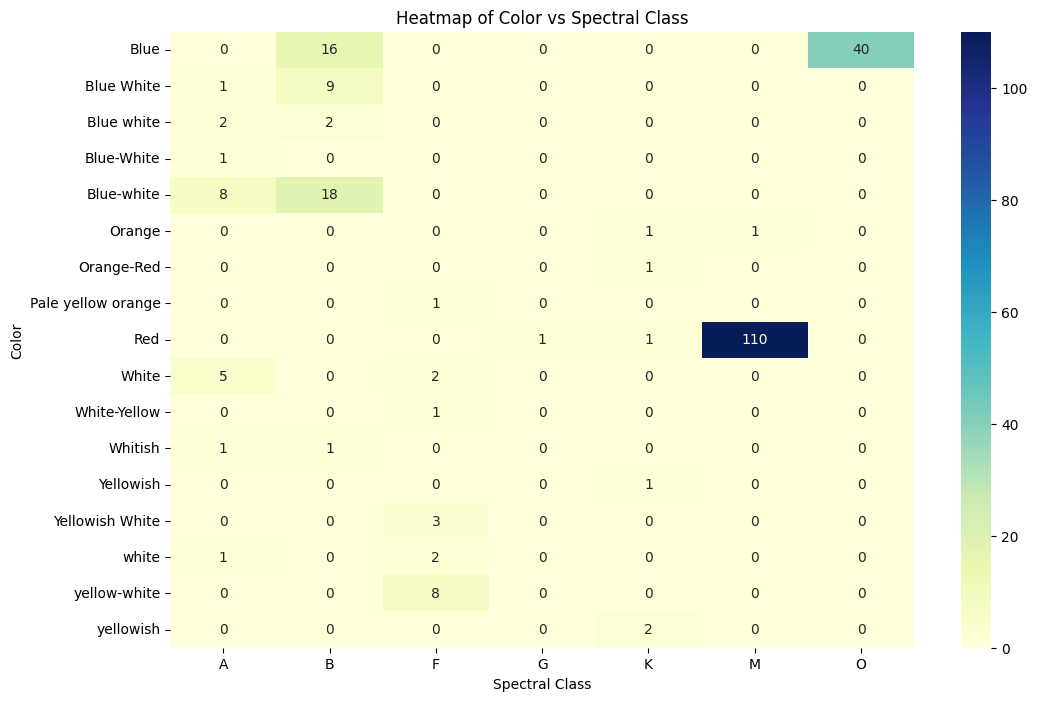

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ver la relación entre 'Color' y 'Spectral_Class'
color_spectral_class = pd.crosstab(stars_data['Color'], stars_data['Spectral_Class'])
print(color_spectral_class)

# Para visualizarlo mejor, puedes usar un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(color_spectral_class, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Heatmap of Color vs Spectral Class')
plt.xlabel('Spectral Class')
plt.ylabel('Color')
plt.show()

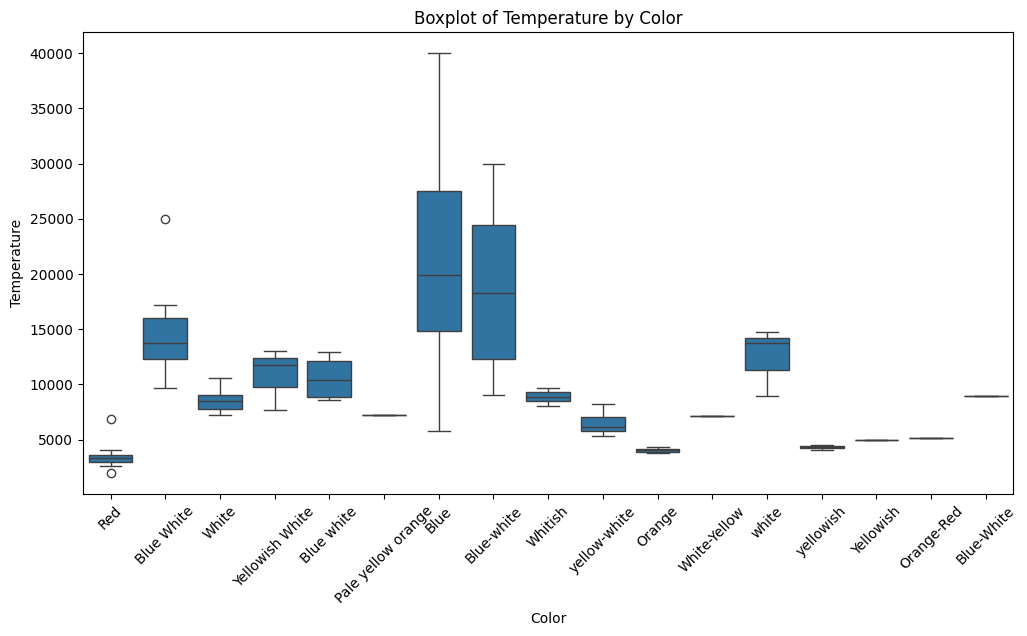

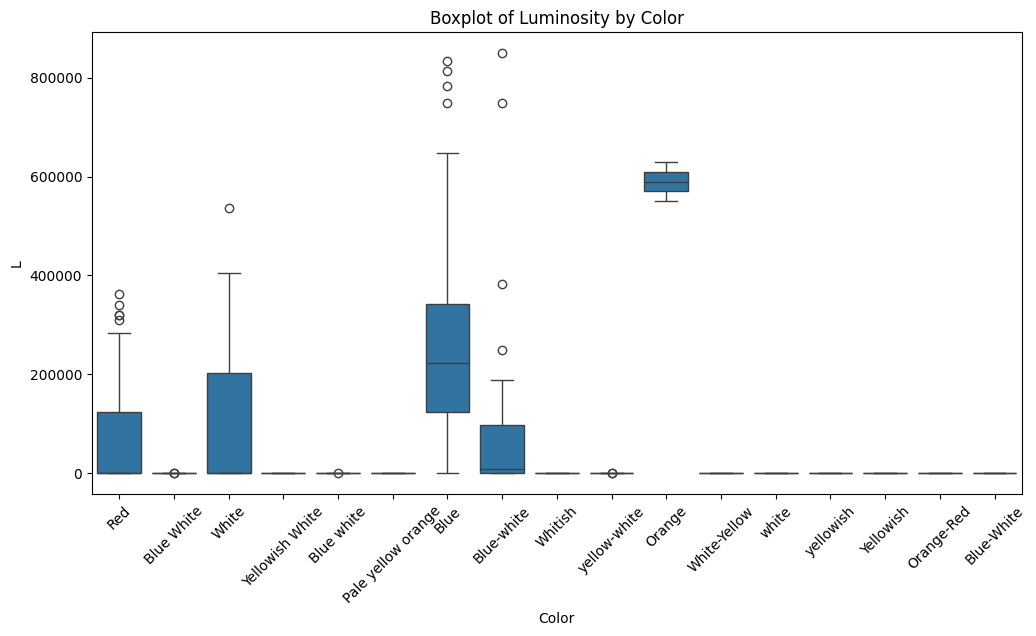

In [ ]:
# Análisis de la relación entre Color y Temperatura
plt.figure(figsize=(12, 6))
sns.boxplot(x='Color', y='Temperature', data=stars_data)
plt.title('Boxplot of Temperature by Color')
plt.xticks(rotation=45)
plt.show()

# Análisis de la relación entre Color y Luminosidad
plt.figure(figsize=(12, 6))
sns.boxplot(x='Color', y='L', data=stars_data)
plt.title('Boxplot of Luminosity by Color')
plt.xticks(rotation=45)
plt.show()

Los datos sugieren que el "Pale Yellow Orange" tiene una luminosidad similar a la de "Yellowish" y "Yellowish White".

A pesar de que "Pale Yellow Orange" se asemeja a "Yellowish" y "Yellowish White" en luminosidad, su asociación con la clase espectral F (indicativa de temperaturas medias) sugiere que podría no ser adecuado agruparla con "Yellowish" que tiene asociaciones con la clase espectral K y "Yellowish White" con la clase F pero con una luminosidad diferente.

Agrupación de Azules y Blancos:

"Blue", "Blue White", "Blue white", "Blue-White", y "Blue-white" pueden agruparse en una categoría común como "Blue White". Todos están asociados con clases espectrales calientes (B y O) y muestran altas temperaturas. Esto tiene sentido desde una perspectiva astronómica, ya que las estrellas más calientes tienden a tener colores azules o azules-blanco.

Agrupación de Amarillos y Naranjas:

"Orange", "Orange-Red", "Pale yellow orange", "Yellowish", "Yellowish White", "yellow-white", y "yellowish" pueden necesitar un análisis más detallado debido a que muestran una variedad de temperaturas y clases espectrales. En particular:

"Orange" y "Orange-Red" comparten clases espectrales K y M, y podría ser razonable agruparlas en "Orange" si se considera que representan el mismo fenómeno astronómico.

"Pale yellow orange" se categoriza en la clase espectral F con una temperatura más alta que las categorías "Orange" y "Red", por lo que puede que no sea apropiado agruparla con categorías más frías. Su asociación singular sugiere que podría ser mejor dejarla como una categoría independiente o considerarla junto con otros colores templados como "White-Yellow".


In [ ]:

# Definir el mapeo para normalizar los nombres
color_mapping = {
    # Agrupar todos los azules y blancos
    "Blue": "Blue White",
    "Blue White": "Blue White",
    "Blue white": "Blue White",
    "Blue-White": "Blue White",
    "Blue-white": "Blue White",
    # Normalizar los blancos
    "White": "White",
    "Whitish": "White",
    "white": "White",
    # Conservar "Pale yellow orange" como independiente
    "Pale yellow orange": "Pale Yellow Orange",
    # Agrupar los naranjas
    "Orange": "Orange",
    "Orange-Red": "Orange",

    "Yellowish": "Yellowish",
    "Yellowish White": "Yellowish",
    "yellow-white": "Yellowish",
    "yellowish": "Yellowish",
    "White-Yellow": "Yellowish",

    "Red": "Red",
}

# Aplicar el nuevo mapeo al DataFrame
stars_data['Color'] = stars_data['Color'].replace(color_mapping)

# Verificar los cambios para asegurarte de que el mapeo se ha aplicado correctamente
print(stars_data['Color'].unique())

# y también la relación con las clases espectrales con este nuevo mapeo
updated_color_counts = stars_data['Color'].value_counts()
updated_color_spectral_class_distribution = pd.crosstab(stars_data['Color'], stars_data['Spectral_Class'])

updated_color_counts, updated_color_spectral_class_distribution




['Red' 'Blue White' 'White' 'Yellowish' 'Pale Yellow Orange' 'Orange']


(Color
 Red                   112
 Blue White             97
 Yellowish              15
 White                  12
 Orange                  3
 Pale Yellow Orange      1
 Name: count, dtype: int64,
 Spectral_Class       A   B   F  G  K    M   O
 Color                                        
 Blue White          12  45   0  0  0    0  40
 Orange               0   0   0  0  2    1   0
 Pale Yellow Orange   0   0   1  0  0    0   0
 Red                  0   0   0  1  1  110   0
 White                7   1   4  0  0    0   0
 Yellowish            0   0  12  0  3    0   0)

In [ ]:


# Información general del DataFrame, incluyendo el tipo de datos y los valores nulos
print("\nInformación del DataFrame:")
stars_data.info()

# Descripción estadística de las variables numéricas
print("\nEstadísticas descriptivas de las variables numéricas:")
print(stars_data.describe())

# Descripción estadística de las variables categóricas
print("\nEstadísticas descriptivas de las variables categóricas:")
print(stars_data.describe(include=['object']))

# Verificación de valores nulos
print("\nVerificación de valores nulos en el dataset:")
print(stars_data.isnull().sum())



Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.4+ KB

Estadísticas descriptivas de las variables numéricas:
        Temperature              L            R         A_M
count    240.000000     240.000000   240.000000  240.000000
mean   10497.462500  107188.361635   237.157781    4.382396
std     9552.425037  179432.244940   517.155763   10.532512
min     1939.000000       0.000080     0.008400  -11.920000
25%     3344.250000       0.000865     0.102750   -6.232500
50%     5776.000000       0.07

- El conjunto de datos contiene 240 entradas.
- Hay seis columnas: Temperature, L (Luminosidad), R (Radio), A_M (Magnitud Absoluta), Color y Spectral_Class.
- Todos los valores están completos en el dataset; no hay valores nulos en ninguna columna.

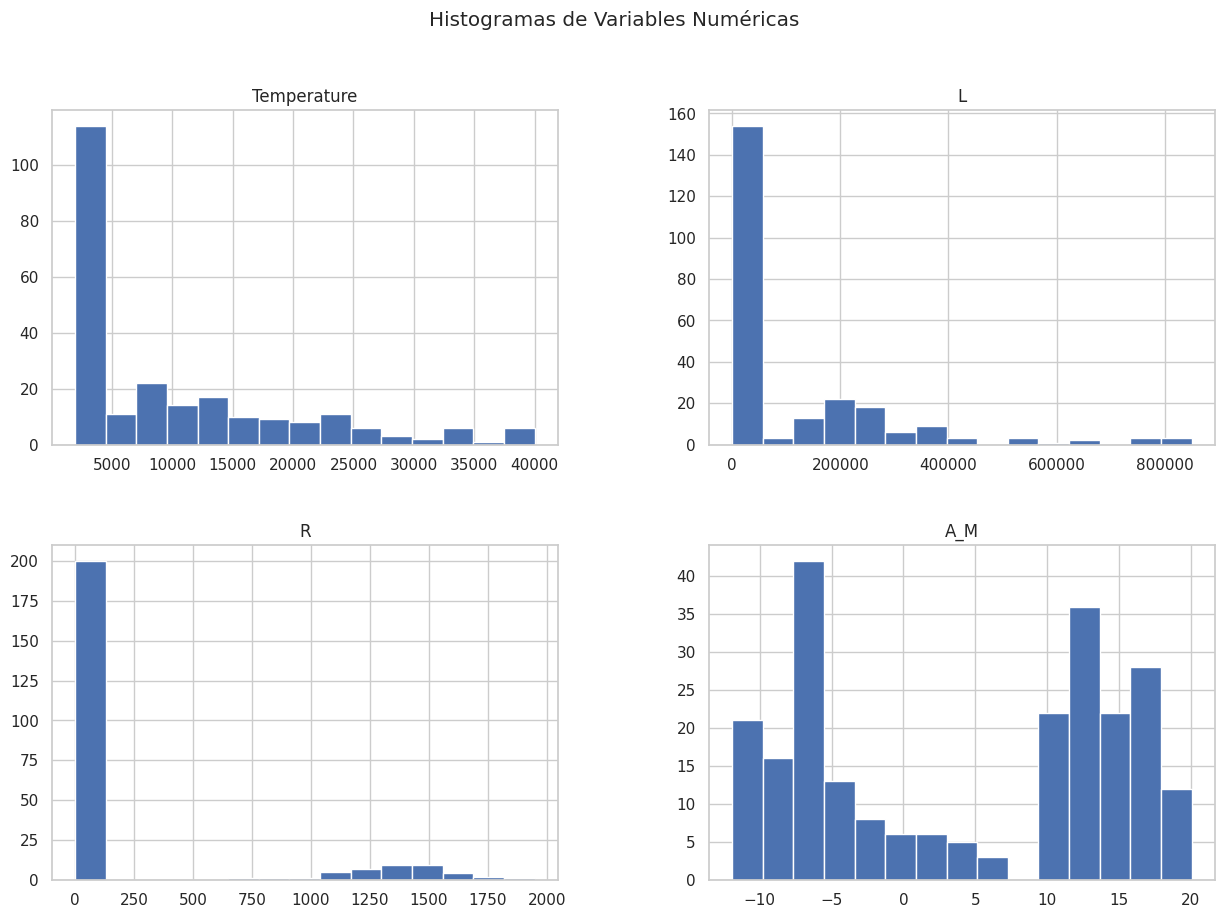

In [ ]:


# Configuración de visualización
sns.set(style="whitegrid")

# Histogramas para variables numéricas
stars_data[['Temperature', 'L', 'R', 'A_M']].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

Temperatura (Temperature):

La mayoría de las estrellas tienen temperaturas por debajo de 10,000 K, con un pico significativo en el extremo inferior del rango.
La distribución muestra que las estrellas frías son mucho más comunes que las calientes

Luminosidad (L):

Hay un pico extremadamente alto para luminosidades bajas, lo que sugiere que las estrellas con baja luminosidad son muy comunes.
Existen algunas estrellas con luminosidades mucho más altas, pero son mucho menos frecuentes.

Radio (R):

Similar a la luminosidad, hay un pico alto para radios pequeños, indicando que la mayoría de las estrellas tienen radios relativamente pequeños comparados con el Sol.
Existe una larga cola hacia radios más grandes, lo que indica que hay unas pocas estrellas con radios mucho más grandes que la mayoría.


Magnitud Absoluta (A_M):

La distribución de la magnitud absoluta muestra varios picos, lo que podría indicar distintas subpoblaciones de estrellas dentro del conjunto de datos.
Las estrellas con magnitudes absolutas alrededor de 10-15 parecen ser las más comunes, con menos estrellas en los extremos de muy brillantes o muy tenues.



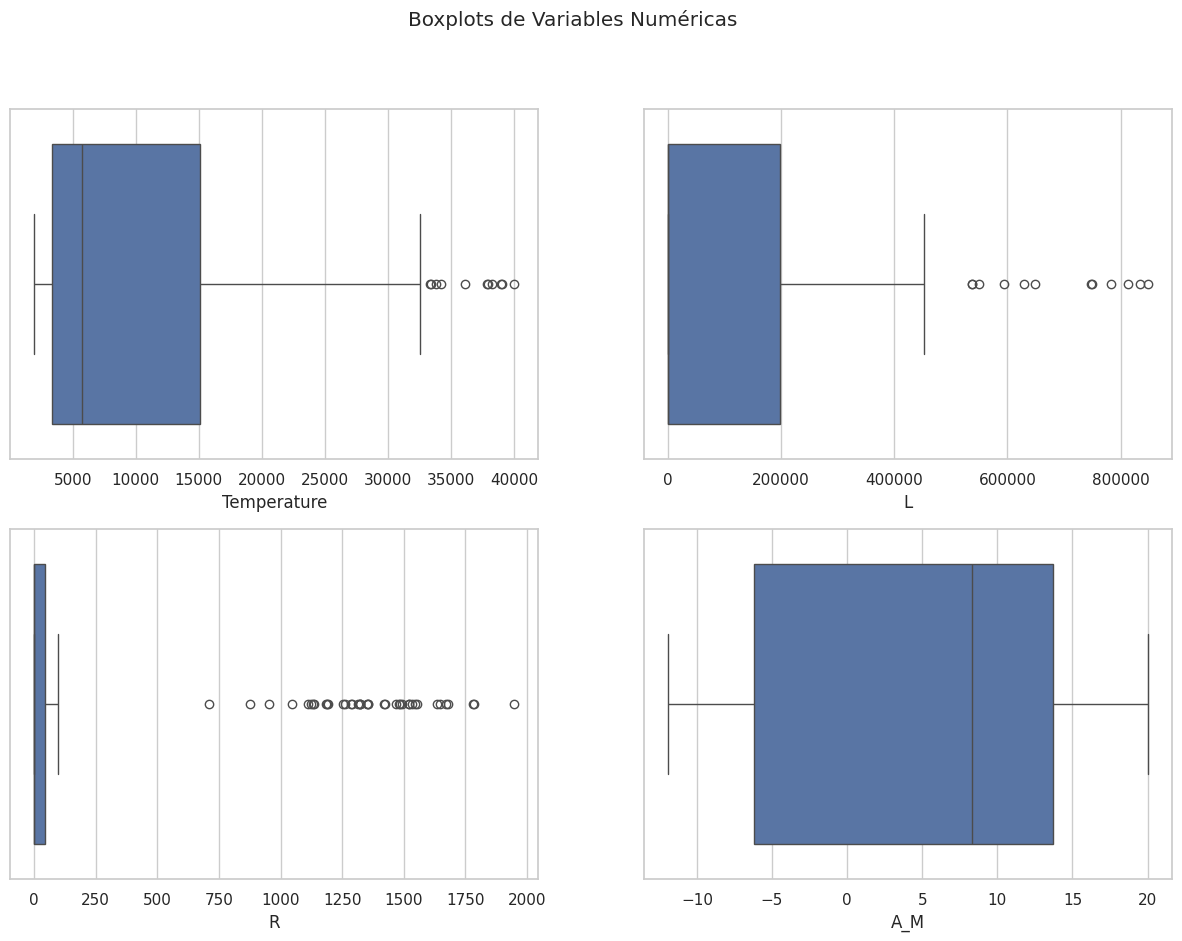

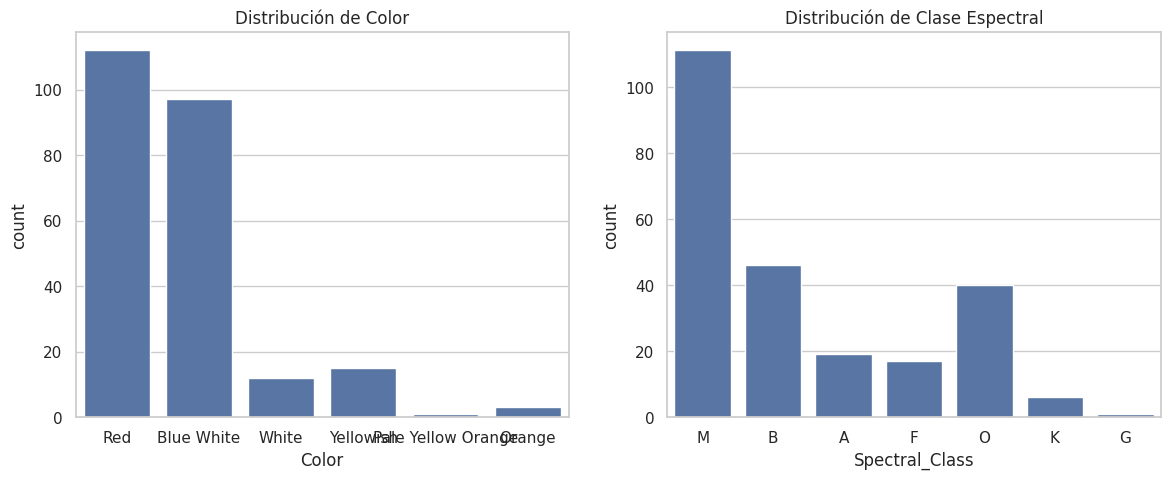

In [ ]:
# Boxplots para variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], data=stars_data, x='Temperature')
sns.boxplot(ax=axes[0, 1], data=stars_data, x='L')
sns.boxplot(ax=axes[1, 0], data=stars_data, x='R')
sns.boxplot(ax=axes[1, 1], data=stars_data, x='A_M')
plt.suptitle('Boxplots de Variables Numéricas')
plt.show()

# Gráficos de barras para variables categóricas
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(ax=ax[0], data=stars_data, x='Color')
sns.countplot(ax=ax[1], data=stars_data, x='Spectral_Class')
ax[0].set_title('Distribución de Color')
ax[1].set_title('Distribución de Clase Espectral')
plt.show()

Ahora haremos un mapa de calor de la correlación entre variables numéricas para identificar si hay alguna relación lineal fuerte entre ellas, lo cual podría influir en cómo se forman los clusters.

En un conjunto de datos con 240 estrellas, una correlación de 0.53 probablemente sea estadísticamente significativa, lo que indica que la relación no es probable que sea debida al azar.

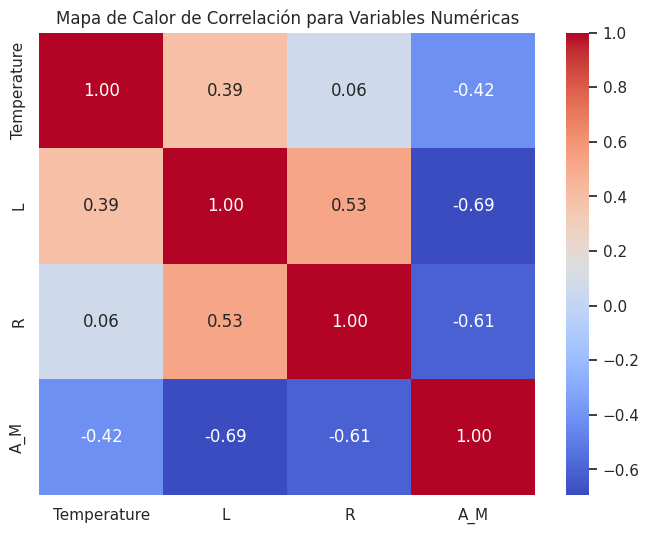

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas para la matriz de correlación
numerical_cols = stars_data.select_dtypes(include=['int64', 'float64'])

# Calculamos la matriz de correlación
correlation_matrix = numerical_cols.corr()

# Usamos seaborn para crear un mapa de calor de las correlaciones
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Título del mapa de calor
plt.title('Mapa de Calor de Correlación para Variables Numéricas')
plt.show()

Podemos observar que tanto entre la temperatura y la luminosidad hay una correlacion del 0.39, y entre el radio y la luminosidad es del 0.53. En nuestro caso, al tener un set de datos pequeño, de 240 estrellas, esta correlación puede ser importante.

Por ejemplo, para la temperatura y la luminosidad, podemos calcular el coeficiente de correlación de Pearson y su valor-p asociado

In [ ]:
from scipy.stats import pearsonr



# Cálculo del coeficiente de correlación de Pearson y el valor-p
corr_coef_1, p_value_1 = pearsonr(stars_data['Temperature'], stars_data['L'])
corr_coef_2, p_value_2 = pearsonr(stars_data['R'], stars_data['L'])

print(f"Coeficiente de correlación de Pearson para Temperatura y Luminosidad: {corr_coef_1:.3f}")
print(f"Valor-p para Temperatura y Luminosidad: {p_value_1:.3e}\n")

print(f"Coeficiente de correlación de Pearson para Radio y Luminosidad: {corr_coef_2:.3f}")
print(f"Valor-p para Radio y Luminosidad: {p_value_2:.3e}")



Coeficiente de correlación de Pearson para Temperatura y Luminosidad: 0.393
Valor-p para Temperatura y Luminosidad: 2.625e-10

Coeficiente de correlación de Pearson para Radio y Luminosidad: 0.527
Valor-p para Radio y Luminosidad: 1.618e-18


Para la temperatura/luminosidad, tenemos un valor de 2.625×10−10, por lo tanto existe una relación estadísticamente significativa entre la temperatura y la luminosidad en el conjunto de datos de estrellas. Es decir, mientras más caliente es una estrella, más luminosa será, en términos generales.

El análisis de la correlación entre el Radio y la Luminosidad de las estrellas en nuestro conjunto de datos revela un coeficiente de Pearson de 0.527, lo cual indica una correlación positiva moderada. Esto sugiere que las estrellas con radios más grandes tienden a ser más luminosas. Dada la naturaleza de las estrellas, donde la luminosidad a menudo aumenta con el tamaño debido a una mayor área de superficie emitiendo luz, este resultado es coherente con los principios astronómicos fundamentales.

Además, el valor-p obtenido es de 1.618×10−181.618×10−18, lo que es significativamente menor que el umbral estándar de 0.05 para la significancia estadística. Por lo tanto, podemos rechazar la hipótesis nula de que no hay correlación entre estas dos variables en la población de la que se extrajo la muestra. En términos estadísticos, esta es una evidencia extremadamente fuerte en contra de la hipótesis nula, fortaleciendo la validez de la correlación observada.

La correlación significativa entre el Radio y la Luminosidad tiene implicaciones importantes para el modelado de clusters estelares. Significa que estas dos características deben considerarse cuidadosamente en los algoritmos de clustering, ya que reflejan una relación física que puede ayudar a identificar tipos distintos de estrellas. Sin embargo, también se debe tener en cuenta la posibilidad de multicolinealidad cuando se utilizan ambos atributos en modelos de clustering y considerar la aplicación de técnicas de reducción de dimensionalidad si se justifica.

In [ ]:
stars_data

stars_data.to_csv('stars_data_filtered.csv',index=False)

## K-Means



<ipython-input-16-b3f8f0e5b042>:55: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', edgecolor='black', s=100)


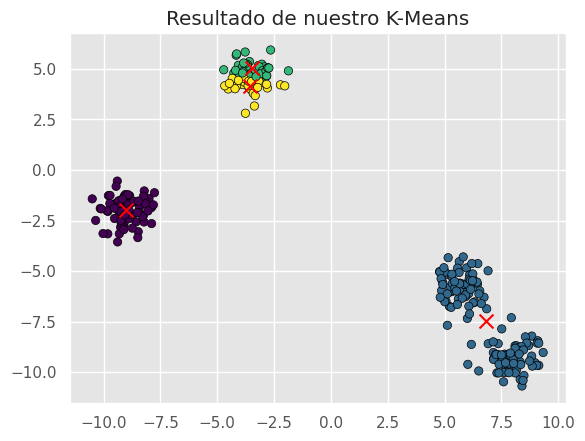

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-b3f8f0e5b042>:62: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(kmeans_sklearn.cluster_centers_[:, 0], kmeans_sklearn.cluster_centers_[:, 1], c='red', marker='x', edgecolor='black', s=100)


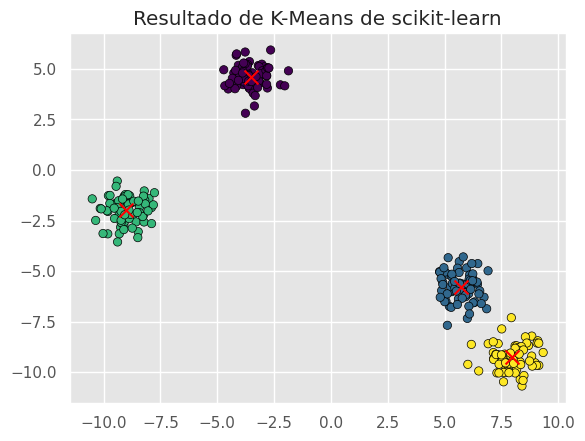

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
from sklearn.metrics import pairwise_distances_argmin

style.use('ggplot') or plt.style.use('ggplot')

# Función para inicializar los centroides de manera aleatoria
def initialize_centroids(X, k):
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    return X[indices]

# Función para asignar cada punto al centroide más cercano
def assign_clusters(X, centroids):
    return pairwise_distances_argmin(X, centroids)

# Función para actualizar los centroides
def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Algoritmo K-Means
def kmeans(X, k, max_iter=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iter):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Simulación de datos
X, y = make_blobs(
    n_samples    = 300,
    n_features   = 2,
    centers      = 4,
    cluster_std  = 0.60,
    shuffle      = True,
    random_state = 100434072
)

# Aplicamos nuestra implementación de K-Means
k = 4  # Número de clusters deseados
centroids, labels = kmeans(X, k)

# Visualizamos el resultado
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='black')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', edgecolor='black', s=100)
plt.title('Resultado de nuestro K-Means')
plt.show()

# Comparamos con scikit-learn K-Means
kmeans_sklearn = KMeans(n_clusters=k, random_state=100434072).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_sklearn.labels_, cmap='viridis', marker='o', edgecolor='black')
plt.scatter(kmeans_sklearn.cluster_centers_[:, 0], kmeans_sklearn.cluster_centers_[:, 1], c='red', marker='x', edgecolor='black', s=100)
plt.title('Resultado de K-Means de scikit-learn')
plt.show()
